<a href="https://colab.research.google.com/github/AshwinsYadav/machine-learning-with-financial-data/blob/main/HiddenMarkovModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALLING DEPENDENCIES
! pip install pyhhmm

In [ ]:
#IMPORTS
import pandas
import numpy
from pyhhmm.gaussian import GaussianHMM
import yfinance
from matplotlib import pyplot


In [ ]:
#DATA EXTRACTION
start_date="2017-01-1"
end_date="2023-07-21"
symbol="SPY"
data=yfinance.download(symbol,start_date,end_date)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,201.337402,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535172,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374268,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098312,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427856,46939700


In [ ]:
#ADDING RETURNS
data["Returns"]=(data["Adj Close"]/data["Adj Close"].shift(1))-1
data["Range"]=(data["High"]/data["Low"])-1
data.dropna(inplace=True)
#len(data) is 1645
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Range
Date,,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,226.580002,202.535172,78744400,0.005949,0.005053
2017-01-05,226.270004,226.580002,225.479996,226.399994,202.374268,78379000,-0.000794,0.004879
2017-01-06,226.529999,227.750000,225.899994,227.210007,203.098312,71559900,0.003578,0.008189
2017-01-09,226.910004,227.070007,226.419998,226.460007,202.427856,46939700,-0.003301,0.002871
2017-01-10,226.479996,227.449997,226.009995,226.460007,202.427856,63771900,0.000000,0.006371


In [ ]:
#ADDING MOVING AVERAGE
data["MA_12"]=data["Adj Close"].rolling(window=12).mean()
data["MA_21"]=data["Adj Close"].rolling(window=21).mean()

In [ ]:
#STRUCTURING DATA
x_train=data[["Returns","Range"]].iloc[:500]
x_test=data[["Returns","Range"]].iloc[500:]
x_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000794,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


In [ ]:
#TRAIN MODEL BY HIDDEN MARKOV MODEL
model=GaussianHMM(n_states=4,covariance_type="full",n_emissions=2)
model.train([numpy.array(x_train.values)])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(<pyhhmm.gaussian.GaussianHMM at 0x7a861a501840>, 3571.2310940212474)

In [ ]:
#CHECK RESULT
hidden_states=model.predict([x_test.values])[0]
df_main=data.iloc[500:]
df_main["HMM"]=hidden_states
df_main.drop(columns=["High","Low"],inplace=True)
df_main.head()

<ipython-input-53-bc1b051593f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["HMM"]=hidden_states
<ipython-input-53-bc1b051593f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.drop(columns=["High","Low"],inplace=True)


,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM
Date,,,,,,,,,
2018-12-31,249.559998,249.919998,232.067352,144299400,0.008759,0.010991,231.581399,238.991980,1
2019-01-02,245.979996,250.179993,232.308777,126925200,0.001040,0.021387,230.525206,238.009937,2
2019-01-03,248.229996,244.210007,226.765274,144140700,-0.023863,0.020109,229.384014,236.690507,2
2019-01-04,247.589996,252.389999,234.360901,142628800,0.033496,0.024032,229.268912,235.572312,2
2019-01-07,252.690002,254.380005,236.208755,103139100,0.007885,0.016926,229.329342,234.939955,0


In [ ]:
#DATA VISUALISATION
i=0
label_0=[]
label_1=[]
label_2=[]
label_3=[]
prices=df_main["Adj Close"].values.astype(float)
for s in hidden_states:
  if s==0:
    label_0.append(prices[i])
    label_1.append(float("nan"))
    label_2.append(float("nan"))
    label_3.append(float("nan"))
  if s==1:
    label_0.append(float("nan"))
    label_1.append(prices[i])
    label_2.append(float("nan"))
    label_3.append(float("nan"))
  if s==2:
    label_0.append(float("nan"))
    label_1.append(float("nan"))
    label_2.append(prices[i])
    label_3.append(float("nan"))
  if s==3:
    label_0.append(float("nan"))
    label_1.append(float("nan"))
    label_2.append(float("nan"))
    label_3.append(prices[i])
  i+=1


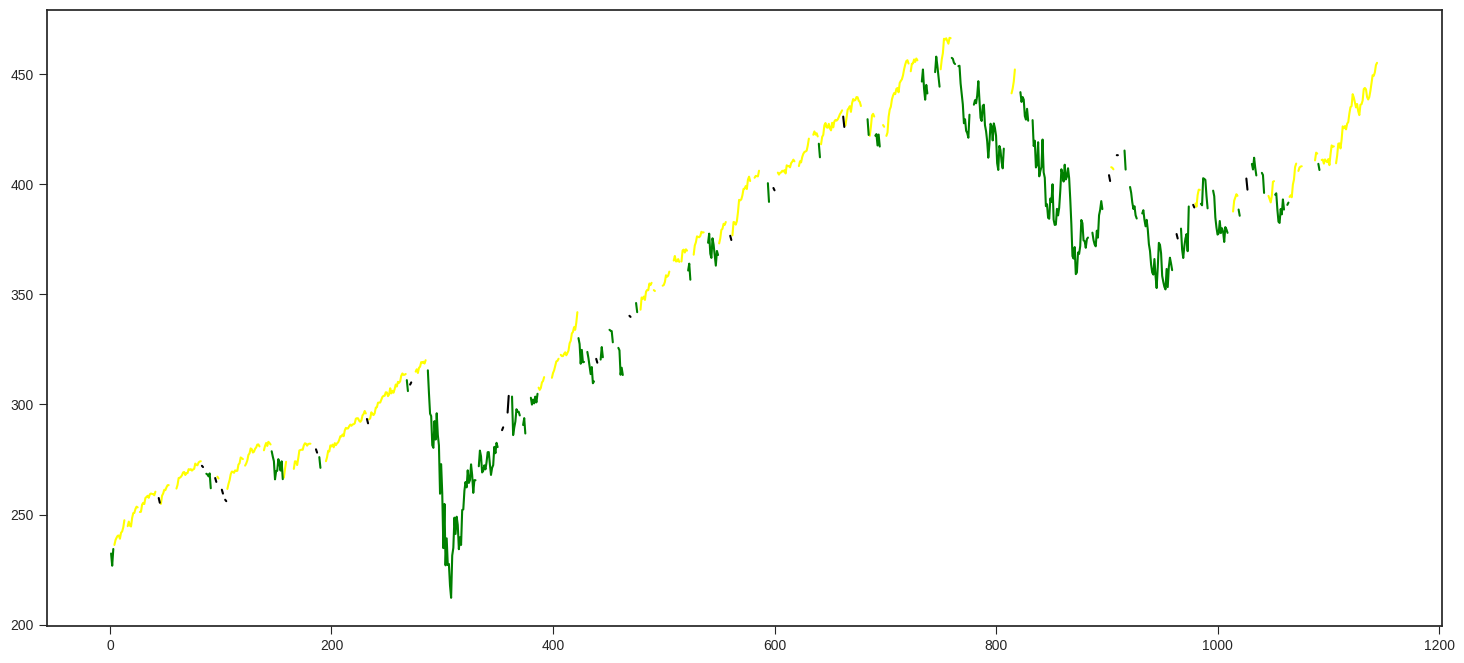

In [ ]:
#PLOT CHART
fig=pyplot.figure(figsize=(18,8))
pyplot.plot(label_0,color="yellow")
pyplot.plot(label_1,color="red")
pyplot.plot(label_2,color="green")
pyplot.plot(label_3,color="black")
pyplot.show()
#The above colour may differ every time

In [ ]:
#RUN BACKTEST
#add Moving average signal
df_main.loc[df_main["MA_12"]>df_main["MA_21"],"MA_signal"]=1
df_main.loc[df_main["MA_12"]<=df_main["MA_21"],"MA_signal"]=0


#add hidden markov model signal
favourable_states=[0]
hmm_values=df_main["HMM"].values
hmm_values=[1 if x in favourable_states else 0 for x in hmm_values]
df_main["HMM_signal"]=hmm_values


#ADD COMBINED SIGNAL
df_main["Main_signal"]=0
df_main.loc[(df_main["MA_signal"]==1)&(df_main["HMM_signal"]==1),"Main_signal"]=1
df_main["Main_signal"]=df_main["Main_signal"].shift(1)

<ipython-input-96-b05a120549bd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["HMM_signal"]=hmm_values
<ipython-input-96-b05a120549bd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["Main_signal"]=0
<ipython-input-96-b05a120549bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
#Benchmark return
df_main["lrets_bench"]=numpy.log(df_main["Adj Close"]/df_main["Adj Close"].shift(1))
df_main["bench_prod"]=df_main["lrets_bench"].cumsum()
df_main["bench_prod_exp"]=numpy.exp(df_main["bench_prod"])-1

<ipython-input-97-8fba136b5afa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["lrets_bench"]=numpy.log(df_main["Adj Close"]/df_main["Adj Close"].shift(1))
<ipython-input-97-8fba136b5afa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["bench_prod"]=df_main["lrets_bench"].cumsum()
<ipython-input-97-8fba136b5afa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
#Strategy return
df_main["lrets_strat"]=numpy.log(df_main["Open"].shift(-1)/df_main["Open"])*df_main["Main_signal"]
df_main["lrets_prod"]=df_main["lrets_strat"].cumsum()
df_main["strat_prod_exp"]=numpy.exp(df_main["lrets_prod"])-1

<ipython-input-98-ad8960b23adc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["lrets_strat"]=numpy.log(df_main["Open"].shift(-1)/df_main["Open"])*df_main["Main_signal"]
<ipython-input-98-ad8960b23adc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["lrets_prod"]=df_main["lrets_strat"].cumsum()
<ipython-input-98-ad8960b23adc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
#review results table
df_main.dropna(inplace=True)
df_main.head()

<ipython-input-99-a8797802b979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main.dropna(inplace=True)


,Open,Close,Adj Close,Volume,Returns,Range,MA_12,MA_21,HMM,MA_signal,HMM_signal,Main_signal,lrets_bench,bench_prod,bench_prod_exp,lrets_strat,lrets_prod,strat_prod_exp
Date,,,,,,,,,,,,,,,,,,
2019-01-09,257.559998,257.970001,239.542328,95006600,0.004673,0.010617,230.815342,234.251352,0,0.0,0,0.0,0.004663,0.004663,0.004673,-0.0,0.0,0.0
2019-01-10,256.260010,258.880005,240.387314,96823900,0.003528,0.014325,232.222121,234.089652,0,0.0,0,0.0,0.003521,0.008184,0.008217,0.0,0.0,0.0
2019-01-11,257.679993,258.980011,240.480194,73858100,0.000386,0.007703,234.128780,233.929741,0,1.0,0,0.0,0.000386,0.008570,0.008607,-0.0,0.0,0.0
2019-01-14,256.859985,257.399994,239.013016,70908200,-0.006101,0.007371,234.996986,233.641495,0,1.0,0,0.0,-0.006120,0.002450,0.002453,0.0,0.0,0.0
2019-01-15,257.820007,260.350006,241.752289,85208300,0.011461,0.011210,235.947219,233.487647,0,1.0,0,0.0,0.011396,0.013846,0.013942,0.0,0.0,0.0


In [ ]:
#CALCULATE SHARP RATIO
def sharpe_ratio(returns_series):
  n=255
  nsqrt=numpy.sqrt(n)
  rf=0.01 #return factor
  mean=returns_series.mean()*n
  sigma=returns_series.std()*nsqrt
  sharpe_ratio=round((mean-rf)/sigma,2)
  return sharpe_ratio

In [ ]:
#METRICS
bench_rets=round(df_main["bench_prod_exp"].values[-1]*100,1)
strat_rets=round(df_main["strat_prod_exp"].values[-1]*100,1)

bench_sharpe=sharpe_ratio(df_main["lrets_bench"].values)
strat_sharpe=sharpe_ratio(df_main["lrets_strat"].values)

In [ ]:
#PRINT METRICS
#print(f"Returns Benchmark:{bench_rets}%")
print("Returns Benchmark",bench_rets ,"%")
print("Returns strategy",strat_rets ,"%")
print("-----------------")
print("sharpe Benchmark",bench_sharpe ,"%")
print("sharpe Benchmark",strat_sharpe ,"%")

Returns Benchmark 88.6 %
Returns strategy -0.9 %
-----------------
sharpe Benchmark 0.61 %
sharpe Benchmark -0.2 %


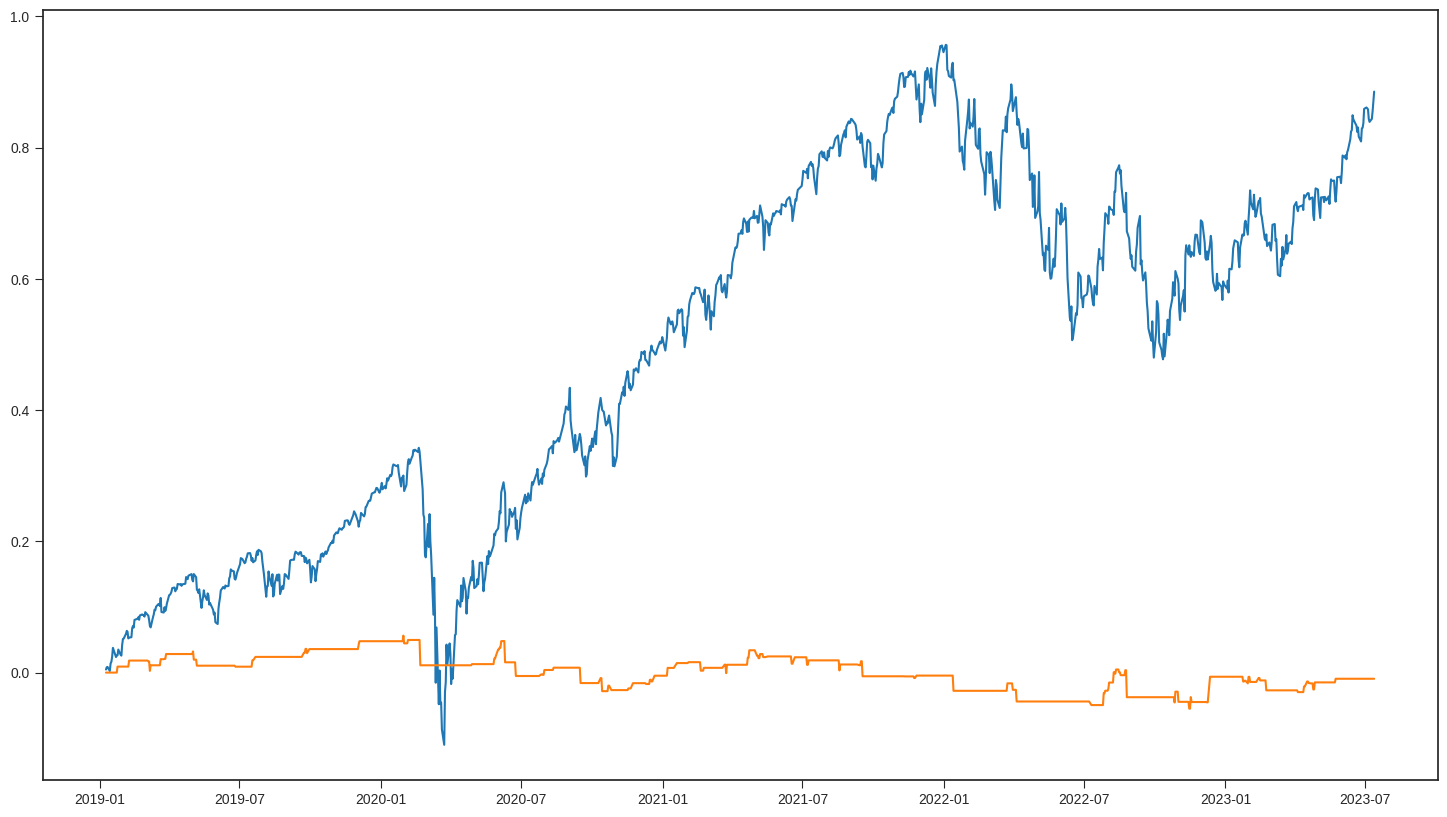

In [ ]:
#PLot Results
fig=pyplot.figure(figsize=(18,10))
pyplot.plot(df_main["bench_prod_exp"])
pyplot.plot(df_main["strat_prod_exp"])
pyplot.show()